In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

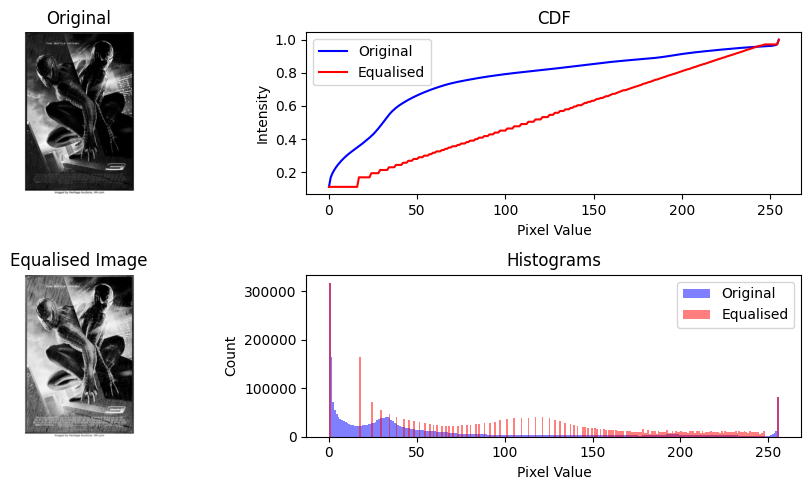

In [3]:
#histogram equalization 
image = cv2.imread('spidey.jpg',cv2.IMREAD_GRAYSCALE)

#Find histogram equalised image
equ = cv2.equalizeHist(image)

#Calculate the histograms 
original_hist,bins_original = np.histogram(image.flatten(),bins=256,range=(0,256))
equalized_hist,bins_equ = np.histogram(equ.flatten(),bins=256,range=(0,256))

#Find the normalised cdf
normalized_original_cdf = original_hist.cumsum()/original_hist.sum()
normalized_equ_cdf =  equalized_hist.cumsum()/equalized_hist.sum()

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(normalized_original_cdf,color='b',label='Original')
plt.plot(normalized_equ_cdf,color='r',label='Equalised')
plt.legend()
plt.title('CDF')
plt.xlabel("Pixel Value")
plt.ylabel("Intensity")

plt.subplot(2,2,3)
plt.imshow(equ,cmap='gray')
plt.title("Equalised Image")
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(image.flatten(),bins=256,range=(0,256),color='b',alpha=0.5,label='Original')
plt.hist(equ.flatten(),bins=256,range=(0,256),color='r',alpha=0.5,label='Equalised')
plt.legend()
plt.title('Histograms')
plt.xlabel('Pixel Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


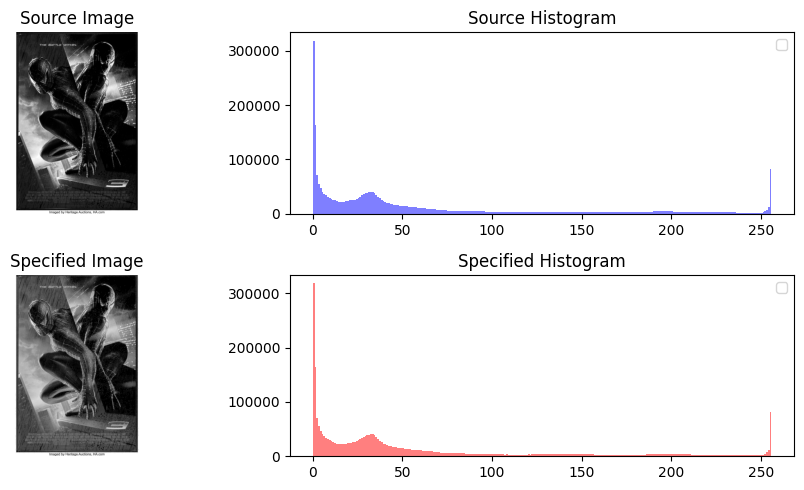

In [4]:
#histogram specification 
src_image = cv2.imread('spidey.jpg',cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('spidey2.jpg',cv2.IMREAD_GRAYSCALE) 

#Calculate the histograms 
src_hist,_ = np.histogram(src_image.flatten(),bins=256,range=(0,256))
target_hist,_ = np.histogram(target_image.flatten(),bins=256,range=(0,256))

#Calculate the normalised cdf
normalized_src_cdf = src_hist.cumsum() / src_hist.sum()
normalized_target_cdf = target_hist.cumsum() / target_hist.sum()

#Apply transformation (interapolate) to map to the target image pixel values 
transformation = np.interp(normalized_src_cdf,normalized_target_cdf,np.arange(256))
transfromed_image = transformation[src_image]

transformed_hist,_= np.histogram(transfromed_image.flatten(),bins=256,range=(0,256))

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(src_image,cmap='gray')
plt.title('Source Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Source Histogram')
plt.hist(src_image.flatten(),bins=256,range=(0,256),color='b',alpha=0.5)
plt.legend()

plt.subplot(2,2,3)
plt.title('Specified Image')
plt.imshow(transfromed_image,cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(src_image.flatten(),bins=256,range=(0,256),color='r',alpha=0.5)
plt.title('Specified Histogram')
plt.legend()

plt.tight_layout()
plt.show()
